In [25]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [26]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.2.4
2.5


In [27]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [118]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [57]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [58]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [59]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.2 Total Costs', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=['A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'], function=<function sum_over at 0

In [32]:
from ema_workbench import Policy

In [33]:
# policy_dict = {}
# for i in range(5):
#     for j in range(3):
#         policy_dict[f'{i}_RfR {j}'] = 0
# policy_dict['EWS_DaysToThreat'] = 0
# for i in range(1,6):
#     for j in range(3):
#         policy_dict[f'A.{i}_DikeIncrease {j}'] = 5
# policy_dict 

# policy = [Policy('only_rfr', **policy_dict)]

# #pass the policies list to EMA workbench experiment runs
# n_scenarios = 5000
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     experiments, outcomes = evaluator.perform_experiments(n_scenarios,
#                                             policy)

# from ema_workbench.util import utilities
# utilities.save_results((experiments, outcomes), 'dike_5_results.tar.gz')

## Optimization

### Policy sampling

In [92]:
def s_to_n(*data):
    mean = np.mean(data)
    std = np.std(data)
    return mean*std

In [93]:
experiments, outcomes = utilities.load_results('../dike_model/results/old_375times100PoliciesPF5.csv')
outcomes_pol_df = pd.DataFrame(outcomes)


[MainProcess/INFO] results loaded succesfully from D:\Willy\Documents\GitHub\Model_based_decision_making\EPA1361\final assignment\dike_model\results\old_375times100PoliciesPF5.csv


In [94]:
outcomes_pol_df

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0.0,8.526436e+07,0.0,6.626218e+07,4.281842e+07,0.006444,0.0,3.728504e+07,0.0,0.000000e+00,...,6.285252e+07,0.0,0.0,1.821456e+07,0.0,0.0,3.971174e+07,0.0,492600000.0,0.0
1,0.0,8.526436e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,3.728504e+07,0.0,0.000000e+00,...,6.285252e+07,0.0,0.0,1.821456e+07,0.0,0.0,3.971174e+07,0.0,492600000.0,0.0
2,0.0,8.526436e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,3.728504e+07,0.0,0.000000e+00,...,6.285252e+07,0.0,0.0,1.821456e+07,0.0,0.0,3.971174e+07,0.0,492600000.0,0.0
3,0.0,8.526436e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,3.728504e+07,0.0,1.199618e+07,...,6.285252e+07,0.0,0.0,1.821456e+07,0.0,0.0,3.971174e+07,0.0,492600000.0,0.0
4,0.0,8.526436e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,3.728504e+07,0.0,0.000000e+00,...,6.285252e+07,0.0,0.0,1.821456e+07,0.0,0.0,3.971174e+07,0.0,492600000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0.0,4.229151e+07,0.0,2.552585e+06,4.281842e+07,0.000440,0.0,4.421502e+07,0.0,0.000000e+00,...,6.826465e+07,0.0,0.0,1.604874e+07,0.0,0.0,7.611792e+07,0.0,256100000.0,0.0
37496,0.0,4.229151e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,4.421502e+07,0.0,0.000000e+00,...,6.826465e+07,0.0,0.0,1.604874e+07,0.0,0.0,7.611792e+07,0.0,256100000.0,0.0
37497,0.0,4.229151e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,4.421502e+07,0.0,8.920557e+05,...,6.826465e+07,0.0,0.0,1.604874e+07,0.0,0.0,7.611792e+07,0.0,256100000.0,0.0
37498,0.0,4.229151e+07,0.0,0.000000e+00,4.281842e+07,0.000000,0.0,4.421502e+07,0.0,0.000000e+00,...,6.826465e+07,0.0,0.0,1.604874e+07,0.0,0.0,7.611792e+07,0.0,256100000.0,0.0


In [95]:
def aggregate_df(df):
    df_aggregate_time = pd.DataFrame()
    df_aggregate_time_location = pd.DataFrame()
    locations = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']
    step = ['0', '1', '2']
    metrics = ['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
    
    for metric in metrics:
        if metric == "RfR Total Costs" or metric == "Expected Evacuation Costs":

            columns = [metric + ' ' + time for time in step]

            df_aggregate_time_location[metric + ' time aggregate'] = df[columns].sum(axis=1)
        else:
            for location in locations:
                columns = [location + '_' + metric + ' ' + time for time in step]

                df_aggregate_time[location + '_' + metric + ' time aggregate'] = df[columns].sum(axis=1)
            
            columns_locations = [location + '_' + metric + ' time aggregate' for location in locations]
            df_aggregate_time_location[metric + ' time location aggregate'] = df_aggregate_time[columns_locations].sum(axis=1)
                    

    return df_aggregate_time, df_aggregate_time_location

In [96]:
df_pol_t, df_pol_tl = aggregate_df(outcomes_pol_df)
df_pol_t.head()

,A.1_Expected Annual Damage time aggregate,A.2_Expected Annual Damage time aggregate,A.3_Expected Annual Damage time aggregate,A.4_Expected Annual Damage time aggregate,A.5_Expected Annual Damage time aggregate,A.1_Dike Investment Costs time aggregate,A.2_Dike Investment Costs time aggregate,A.3_Dike Investment Costs time aggregate,A.4_Dike Investment Costs time aggregate,A.5_Dike Investment Costs time aggregate,A.1_Expected Number of Deaths time aggregate,A.2_Expected Number of Deaths time aggregate,A.3_Expected Number of Deaths time aggregate,A.4_Expected Number of Deaths time aggregate,A.5_Expected Number of Deaths time aggregate
0,0.0,7.602845e+07,0.0,0.000000e+00,0.0,2.342822e+08,1.641588e+08,1.378172e+08,4.422295e+07,1.122923e+08,0.0,0.008431,0.0,0.000000,0.0
1,0.0,0.000000e+00,0.0,0.000000e+00,0.0,2.342822e+08,1.641588e+08,1.378172e+08,4.422295e+07,1.122923e+08,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000e+00,0.0,0.000000e+00,0.0,2.342822e+08,1.641588e+08,1.378172e+08,4.422295e+07,1.122923e+08,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.000000e+00,0.0,1.199618e+07,0.0,2.342822e+08,1.641588e+08,1.378172e+08,4.422295e+07,1.122923e+08,0.0,0.000000,0.0,0.000532,0.0
4,0.0,0.000000e+00,0.0,0.000000e+00,0.0,2.342822e+08,1.641588e+08,1.378172e+08,4.422295e+07,1.122923e+08,0.0,0.000000,0.0,0.000000,0.0


In [115]:
outcomes_pol_df.columns
funcs={}
for i in outcomes_pol_df.columns:
    funcs[i] = s_to_n
    
funcs

{'A.1_Expected Annual Damage 0': <function __main__.s_to_n(*data)>,
 'A.1_Dike Investment Costs 0': <function __main__.s_to_n(*data)>,
 'A.1_Expected Number of Deaths 0': <function __main__.s_to_n(*data)>,
 'A.2_Expected Annual Damage 0': <function __main__.s_to_n(*data)>,
 'A.2_Dike Investment Costs 0': <function __main__.s_to_n(*data)>,
 'A.2_Expected Number of Deaths 0': <function __main__.s_to_n(*data)>,
 'A.3_Expected Annual Damage 0': <function __main__.s_to_n(*data)>,
 'A.3_Dike Investment Costs 0': <function __main__.s_to_n(*data)>,
 'A.3_Expected Number of Deaths 0': <function __main__.s_to_n(*data)>,
 'A.4_Expected Annual Damage 0': <function __main__.s_to_n(*data)>,
 'A.4_Dike Investment Costs 0': <function __main__.s_to_n(*data)>,
 'A.4_Expected Number of Deaths 0': <function __main__.s_to_n(*data)>,
 'A.5_Expected Annual Damage 0': <function __main__.s_to_n(*data)>,
 'A.5_Dike Investment Costs 0': <function __main__.s_to_n(*data)>,
 'A.5_Expected Number of Deaths 0': <func

In [117]:
df_pol_t.to_dict('list')

{'A.1_Expected Annual Damage time aggregate': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [114]:
temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
temp_outcomes

{'A.1_Expected Annual Damage 0': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.46672923e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.52362517e+06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.000000

C:\Users\Willy\Anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


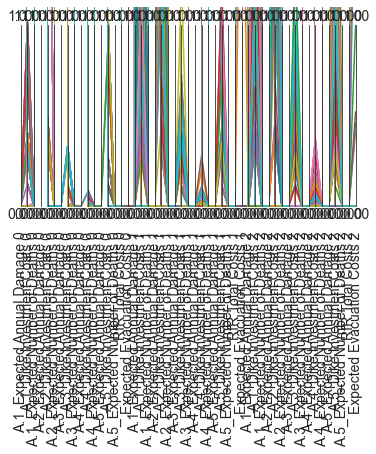

In [106]:
from ema_workbench.analysis import parcoords

funcs = {'A.1_Expected Annual Damage time aggregate':s_to_n,
         'A.2_Expected Annual Damage time aggregate':s_to_n,
         'A.3_Expected Annual Damage time aggregate':s_to_n,
         'A.4_Expected Annual Damage time aggregate':s_to_n,
         'A.5_Expected Annual Damage time aggregate':s_to_n,
         'A.1_Dike Investment Costs time aggregate':s_to_n,
         'A.2_Dike Investment Costs time aggregate':s_to_n,
         'A.3_Dike Investment Costs time aggregate':s_to_n,
         'A.4_Dike Investment Costs time aggregate':s_to_n,
         'A.5_Dike Investment Costs time aggregate':s_to_n,
         'A.1_Expected Number of Deaths time aggregate':s_to_n,
         'A.2_Expected Number of Deaths time aggregate':s_to_n,
         'A.3_Expected Number of Deaths time aggregate':s_to_n,
         'A.4_Expected Number of Deaths time aggregate':s_to_n,
         'A.5_Expected Number of Deaths time aggregate':s_to_n}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [34]:
# load the basecase results
from ema_workbench import load_results
experiments, outcomes = load_results('../results/basecase_results.tar.gz') 
outcomes_df = pd.DataFrame.from_dict(outcomes)

[MainProcess/INFO] results loaded succesfully from D:\Willy\Documents\GitHub\Model_based_decision_making\EPA1361\final assignment\results\basecase_results.tar.gz


In [35]:
# function to aggregate over time and locations
def aggregate_df(df):
    df_aggregate_time = pd.DataFrame()
    df_aggregate_time_location = pd.DataFrame()
    locations = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']
    step = ['0', '1', '2']
    metrics = ['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
    
    for metric in metrics:
        if metric == "RfR Total Costs" or metric == "Expected Evacuation Costs":

            columns = [metric + ' ' + time for time in step]

            df_aggregate_time_location[metric + ' time aggregate'] = df[columns].sum(axis=1)
        else:
            for location in locations:
                columns = [location + '_' + metric + ' ' + time for time in step]

                df_aggregate_time[location + '_' + metric + ' time aggregate'] = df[columns].sum(axis=1)
            
            columns_locations = [location + '_' + metric + ' time aggregate' for location in locations]
            df_aggregate_time_location[metric + ' time location aggregate'] = df_aggregate_time[columns_locations].sum(axis=1)
                    

    return df_aggregate_time, df_aggregate_time_location

In [36]:
df_t, df_tl = aggregate_df(outcomes_df)
df_tl.head()

,Expected Annual Damage time location aggregate,Dike Investment Costs time location aggregate,Expected Number of Deaths time location aggregate,RfR Total Costs time aggregate,Expected Evacuation Costs time aggregate
0,2.834163e+09,0,1.931043,0.0,0.0
1,5.035985e+09,0,5.212136,0.0,0.0
2,3.860589e+09,0,4.232087,0.0,0.0
3,2.891039e+09,0,2.097578,0.0,0.0
4,1.878022e+09,0,3.630789,0.0,0.0


In [39]:
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
# convergence_metrics = [HyperVolume.from_outcomes(dike_model.outcomes),
#                        EpsilonProgress()]
for i in dike_model.outcomes:
    print(i)
    


ScalarOutcome('A.1 Total Costs', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.2 Total Costs', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function=<function sum_over at 0x0000025F5F4C4678>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=['A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'], function=<function sum_over at 0

In [40]:
# Instantiate the model
dike_model, planning_steps = get_model_for_problem_formulation(3)

# Redefine the uncertainties
dike_model.uncertainties['A.1_pfail'] = RealParameter('A.1_pfail', 0.000120, 0.414252)
dike_model.uncertainties['A.3_pfail'] = RealParameter('A.3_pfail', 0.000010, 0.181847)
dike_model.uncertainties['A.1_Bmax'] = RealParameter('A.1_Bmax', 30.012525, 298.534935)
#dike_model.uncertainties['A.4_Bmax'] = RealParameter('A.4_Bmax', 39.275594, 349.965209)

In [78]:
from ema_workbench import (MultiprocessingEvaluator, Policy, Scenario, Constraint)


#Making lists of all the disaggregated variables in order to properly use the total aggregated variables

#rfr_costs = ['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']


evac_costs = ['Expected Evacuation Costs']


total_costs = ['A.1 Total Costs', 'A.2 Total Costs','A.3 Total Costs','A.4 Total Costs', 'A.5 Total Costs']

#Specifying robustness functions. All have to be minimized. All except for the variance will use the 'signal_to_noise' function.
#Variance will use the 'signal_to_noise_variation' function, which contains the extra step of first calculating the standard deviation.
robustnes_functions = [ScalarOutcome('Annual Costs Score', kind=ScalarOutcome.MINIMIZE, variable_name=total_costs, function=s_to_n),
                        ScalarOutcome('Evacuation Costs Score', kind=ScalarOutcome.MINIMIZE, variable_name=evac_costs, function=s_to_n)]#,
                        #ScalarOutcome('RfR Costs Score', kind=ScalarOutcome.MINIMIZE, variable_name=rfr_costs, function=s_to_n)]

max_num_deaths = 0.00001

# deaths = ['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2',
#                    'A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2',
#                    'A.3_Expected Number of Deaths 0', 'A.3_Expected Number of Deaths 1', 'A.3_Expected Number of Deaths 2',
#                    'A.4_Expected Number of Deaths 0', 'A.4_Expected Number of Deaths 1', 'A.4_Expected Number of Deaths 2',
#                    'A.5_Expected Number of Deaths 0', 'A.5_Expected Number of Deaths 1', 'A.5_Expected Number of Deaths 2']

deaths = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths']

#Adding the constraint for Room for the River costs.
constraints = [Constraint("max number of deaths A.1", outcome_names=deaths[0],
                          function=lambda x:max(0, x-max_num_deaths)),
               Constraint("max number of deaths A.2", outcome_names=deaths[1],
                          function=lambda x:max(0, x-max_num_deaths)),
               Constraint("max number of deaths A.3", outcome_names=deaths[2],
                          function=lambda x:max(0, x-max_num_deaths)),
               Constraint("max number of deaths A.4", outcome_names=deaths[3],
                          function=lambda x:max(0, x-max_num_deaths)),
               Constraint("max number of deaths A.5", outcome_names=deaths[4],
                          function=lambda x:max(0, x-max_num_deaths))]

In [79]:
len(robustnes_functions)

2

In [46]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 10
scenarios = sample_uncertainties(dike_model, n_scenarios)

In [47]:
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator
import time

ema_logging.log_to_stderr(ema_logging.INFO)

convergence = [HyperVolume(minimum=[0, 0], 
                           maximum=[1e10, 1e6]),
               EpsilonProgress()]
nfe = int(15)

start = time.time()

with MultiprocessingEvaluator(dike_model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios=n_scenarios, 
                                               nfe=nfe, convergence=convergence,
                                               epsilons=[10,1],
                                               constraint=constraints)
    

end = time.time()

print('Processing time:',(end-start)/60,'Minutes')

from ema_workbench.util import utilities
utilities.save_results((archive, convergence), 'optimisation_results.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/15 nfe
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to D:\Willy\Documents\GitHub\Model_based_decision_making\EPA1361\final assignment\dike_model\optimisation_results.tar.gz


Processing time: 10.793134184678395 Minutes


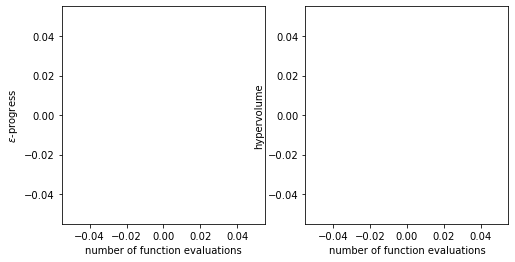

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

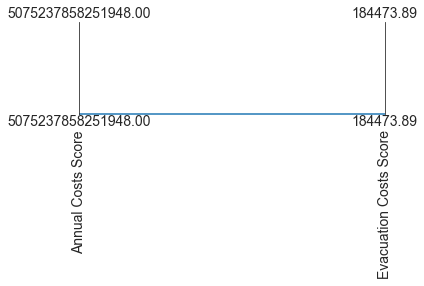

In [51]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
# limits.loc[0, :] = 0
# limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

### 